#### 0. Exploring the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")


In [2]:
RANDOM_STATE = 42
df = pd.read_csv("./datasource/accident_2022.csv")

In [3]:
df.describe()

,CASENUM,PSU,PSU_VAR,PSUSTRAT,REGION,URBANICITY,STRATUM,PJ,WEIGHT,PEDS,...,WEATHER,WEATHR_IM,SCH_BUS,INT_HWY,MAX_SEV,MAXSEV_IM,NUM_INJ,NO_INJ_IM,ALCOHOL,ALCHL_IM
count,5.395500e+04,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,...,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.000000,53955.00000
mean,2.022043e+11,48.251469,50.984784,12.431508,2.719563,1.243369,7.217570,2373.481234,109.915598,0.096747,...,5.333667,2.360152,0.005375,0.097044,1.121286,0.977537,2.554629,0.747289,4.732685,1.92794
std,2.675263e+05,19.996177,29.120100,6.155197,0.877424,0.429120,2.591102,1677.740590,65.879439,0.311848,...,16.883464,3.059557,0.073117,0.304903,1.574404,1.164642,13.258251,0.970859,3.473328,0.25859
min,2.022037e+11,10.000000,10.000000,1.000000,1.000000,1.000000,2.000000,45.000000,8.770366,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
25%,2.022040e+11,32.000000,32.000000,8.000000,2.000000,1.000000,6.000000,573.000000,47.501682,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000
50%,2.022043e+11,48.000000,48.000000,12.000000,3.000000,1.000000,8.000000,1800.000000,121.498316,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.00000
75%,2.022045e+11,65.000000,67.000000,16.000000,3.000000,1.000000,9.000000,4142.000000,145.062232,0.000000,...,2.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,9.000000,2.00000
max,2.022048e+11,83.000000,214.000000,25.000000,4.000000,2.000000,10.000000,4154.000000,520.822735,5.000000,...,99.000000,12.000000,1.000000,9.000000,9.000000,8.000000,99.000000,14.000000,9.000000,2.00000


In [4]:
df.columns

Index(['CASENUM', 'PSU', 'PSU_VAR', 'PSUSTRAT', 'REGION', 'REGIONNAME',
       'URBANICITY', 'URBANICITYNAME', 'STRATUM', 'STRATUMNAME', 'PJ',
       'WEIGHT', 'PEDS', 'PERNOTMVIT', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL',
       'PERMVIT', 'MONTH', 'MONTHNAME', 'DAY_WEEK', 'DAY_WEEKNAME', 'WKDY_IM',
       'WKDY_IMNAME', 'YEAR', 'YEARNAME', 'HOUR', 'HOURNAME', 'HOUR_IM',
       'HOUR_IMNAME', 'MINUTE', 'MINUTENAME', 'MINUTE_IM', 'MINUTE_IMNAME',
       'HARM_EV', 'HARM_EVNAME', 'EVENT1_IM', 'EVENT1_IMNAME', 'MAN_COLL',
       'MAN_COLLNAME', 'MANCOL_IM', 'MANCOL_IMNAME', 'RELJCT1', 'RELJCT1NAME',
       'RELJCT1_IM', 'RELJCT1_IMNAME', 'RELJCT2', 'RELJCT2NAME', 'RELJCT2_IM',
       'RELJCT2_IMNAME', 'TYP_INT', 'TYP_INTNAME', 'REL_ROAD', 'REL_ROADNAME',
       'WRK_ZONE', 'WRK_ZONENAME', 'LGT_COND', 'LGT_CONDNAME', 'LGTCON_IM',
       'LGTCON_IMNAME', 'WEATHER', 'WEATHERNAME', 'WEATHR_IM', 'WEATHR_IMNAME',
       'SCH_BUS', 'SCH_BUSNAME', 'INT_HWY', 'INT_HWYNAME', 'MAX_SEV',
       'MAX_SEVN

In [5]:
#dropping identifier columns
columns_to_keep = [
    'MONTH', 'DAY_WEEK', 'HOUR',
    'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
    'TYP_INT', 'REL_ROAD', 'WRK_ZONE',
    'LGT_COND', 'WEATHER', 'SCH_BUS', 'INT_HWY', 'ALCOHOL', 'MAX_SEV'
]
df = df[columns_to_keep]

In [6]:
df['MAX_SEV'].value_counts(normalize=True)

MAX_SEV
0    0.481160
1    0.206061
2    0.161301
3    0.107238
4    0.023798
9    0.018071
5    0.001928
8    0.000389
6    0.000056
Name: proportion, dtype: float64

In [7]:
#dropping unlabeled data
df = df[df['MAX_SEV'] <= 4]
#convert all features into category
for col in df.select_dtypes(include='number'):
    df[col] = df[col].astype('category')
df.describe()

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,ALCOHOL,MAX_SEV
count,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852,52852
unique,12,7,25,55,11,4,15,11,13,5,9,13,2,3,4,5
top,10,6,17,12,0,0,1,1,1,0,1,1,0,0,2,0
freq,4905,8871,4297,35136,17521,48795,21510,28093,42920,51985,35833,39284,52564,47694,29660,25961


In [70]:
df[['WRK_ZONE', 'SCH_BUS']].describe()


,WRK_ZONE,SCH_BUS
count,284955.0,284955.0
unique,5.0,2.0
top,0.0,0.0
freq,280045.0,283508.0


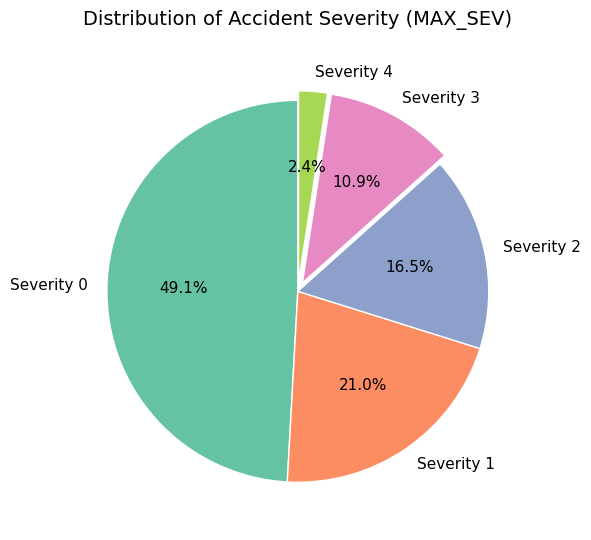

In [8]:
# Prepare data
counts = df['MAX_SEV'].value_counts().sort_index()
labels = [f"Severity {i}" for i in counts.index]

# Use a distinct color palette
colors = sns.color_palette("Set2", n_colors=len(counts))
explode = [0.05 if c < counts.max() * 0.3 else 0 for c in counts]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor':'white', 'linewidth':1}
)
plt.title("Distribution of Accident Severity (MAX_SEV)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


The dataset is highly imbalanced — if we predict class 0 (no injury) for all data points, we still achieve around 50% accuracy. However, the proportion of serious injury and fatal accidents is extremely low, which causes the model to become biased toward the majority class.

To address this issue, we obtained the Accidents dataset for 2016-2021 from the same source and combined it with the main dataset. This helps increase the representation of high-severity cases, providing a more balanced dataset and improving the model’s ability to detect severe accidents.

In [53]:
#combine 2 data
# === Load additional data ===
df_2020 = pd.read_csv("./datasource/accident_2020.csv")
df_2021 = pd.read_csv("./datasource/accident_2021.csv")
df_2019 = pd.read_csv("./datasource/accident_2019.csv")
df_2018 = pd.read_csv("./datasource/accident_2018.csv")
df_2017 = pd.read_csv("./datasource/accident_2017.csv")
df_2016 = pd.read_csv("./datasource/accident_2016.csv")


df_2016 = df_2016[columns_to_keep]
df_2017 = df_2017[columns_to_keep]
df_2018 = df_2018[columns_to_keep]
df_2019 = df_2019[columns_to_keep]
df_2020 = df_2020[columns_to_keep]
df_2021 = df_2021[columns_to_keep]
df_extra = pd.concat([
    df_2020[df_2020['MAX_SEV'].isin([0,1,2,3,4])],
    df_2021[df_2021['MAX_SEV'].isin([0,1,2,3,4])],
    df_2019[df_2019['MAX_SEV'].isin([0,1,2,3,4])],
    df_2018[df_2018['MAX_SEV'].isin([0,1,2,3,4])],
    df_2017[df_2017['MAX_SEV'].isin([0,1,2,3,4])],
    df_2016[df_2016['MAX_SEV'].isin([1,2,3,4])]
], ignore_index=True)

# === Combine with 2022 dataset ===
df= pd.concat([df, df_extra], ignore_index=True)

# === Drop unlabel data ===
df = df[df['MAX_SEV'] <= 4]
# === Show new distribution ===
print("✅ Combined dataset shape:", df.shape)
print("\nProportion of severity levels:")
print(df['MAX_SEV'].value_counts(normalize=True) * 100)


/var/folders/83/lj7q7r3n2378j68znzw3f4hc0000gp/T/ipykernel_5668/2102629843.py:5: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv("./datasource/accident_2019.csv")


✅ Combined dataset shape: (571758, 16)

Proportion of severity levels:
MAX_SEV
0    44.121989
1    24.301015
2    17.677059
3    11.616278
4     2.283658
Name: proportion, dtype: float64


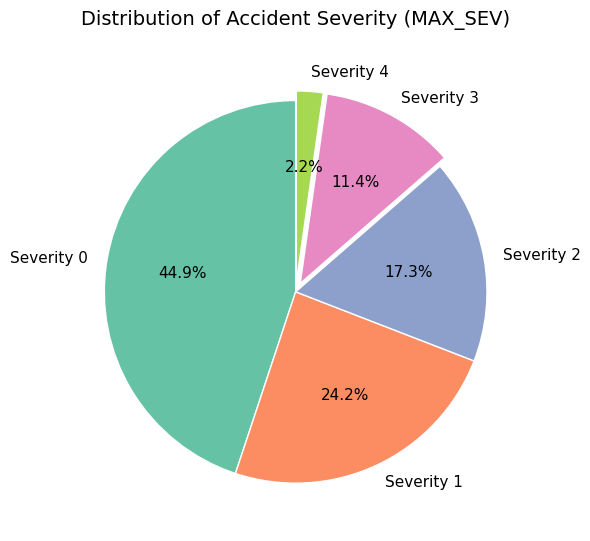

In [10]:
counts = df['MAX_SEV'].value_counts().sort_index()
labels = [f"Severity {i}" for i in counts.index]
colors = sns.color_palette("Set2", n_colors=len(counts))
explode = [0.05 if c < counts.max() * 0.3 else 0 for c in counts]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor':'white', 'linewidth':1}
)
plt.title("Distribution of Accident Severity (MAX_SEV)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [11]:
df.head(5)

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,REL_ROAD,WRK_ZONE,LGT_COND,WEATHER,SCH_BUS,INT_HWY,ALCOHOL,MAX_SEV
0,1,7,9,12,2,0,1,1,1,0,1,2,0,0,9,4
1,1,7,21,42,0,0,1,1,4,0,2,2,0,1,2,2
2,1,1,5,12,1,0,1,1,1,0,3,2,0,0,2,0
3,1,7,22,12,1,0,1,1,1,0,3,2,0,0,9,0
4,1,1,2,24,0,1,19,1,4,0,3,99,0,0,1,1


| **Column**   | **Definition**                                                                                                   |
| ------------ | ------------------------------------------------------------------------------------------------------------------------ |
| **MONTH**    | Month of crash (1 = January, …, 12 = December).                                                                          |
| **DAY_WEEK** | Day of week of crash (1 = Sunday, …, 7 = Saturday).                                                                      |
| **HOUR**     | Hour of crash (0–23, based on 24-hour clock).                                                                            |
| **HARM_EV**  | First harmful event — the first injury-producing event in the crash (e.g., collision with vehicle, object, or overturn). |
| **MAN_COLL** | Manner of collision — how the vehicles collided (e.g., angle, head-on, sideswipe).                                       |
| **RELJCT1**  | Relation to junction — whether the crash occurred at or near an intersection.                                            |
| **RELJCT2**  | Relation to junction detail — secondary relation to specific junction features (e.g., ramp, merge area).                 |
| **TYP_INT**  | Type of intersection (e.g., 4-way, T-intersection, roundabout).                                                          |
| **REL_ROAD** | Relation to roadway — location of crash relative to the roadway (e.g., on road, shoulder, median, roadside).             |
| **WRK_ZONE** | Indicates if the crash occurred in or near a work zone.                                                                  |
| **LGT_COND** | Lighting condition at the time of crash (e.g., daylight, dark-lighted, dark-unlighted).                                  |
| **WEATHER**  | Atmospheric conditions during crash (e.g., clear, rain, snow, fog).                                                      |
| **SCH_BUS**  | School bus involvement (0 = none, 1 = directly involved, 2 = indirectly).                                                |
| **INT_HWY**  | Whether the crash occurred on or was related to an interstate highway.                                                   |
| **ALCOHOL**  | Indicates whether alcohol was a contributing factor (derived from driver or crash data).                                 |
| **MAX_SEV**  | Maximum severity of injury in the crash (0 = no injury, 4 = fatal).                                                      |


In [12]:
#check for missing/unknown value
UNKNOWN_MAP = {
    "HOUR":      {99},
    "WEATHER":   {9},           
    "LGT_COND":  {8, 9},         
    "SCH_BUS":   {9},
    "INT_HWY":   {9},
    "ALCOHOL":   {8,9},
    "MAN_COLL":  {98, 99},      
    "HARM_EV":   {98, 99},
    "RELJCT1":   {8, 9},
    "RELJCT2":   {98, 99},
    "TYP_INT":   {98, 99},
    "REL_ROAD":  {98,99},
    "WRK_ZONE":  {4},
}
rows = []
n = len(df)
for col in df.columns:
    codes = UNKNOWN_MAP.get(col, set())
    if len(codes) == 0:
        unk_count = 0
    else:
        unk_count = df[col].isin(codes).sum()
    rows.append({
        "column": col,
        "unknown_codes": sorted(codes),
        "unknown_count": int(unk_count),
        "unknown_percent": round(100 * unk_count / n, 3) if n else 0.0
    })
unknown_summary = pd.DataFrame(rows).sort_values("unknown_percent", ascending=False)
print(unknown_summary)
df_clean = df.copy()
for col, codes in UNKNOWN_MAP.items():
    if codes:
        df_clean.loc[df_clean[col].isin(codes), col] = np.nan

      column unknown_codes  unknown_count  unknown_percent
14   ALCOHOL        [8, 9]          93794           27.766
5    RELJCT1        [8, 9]          64476           19.087
7    TYP_INT      [98, 99]          28674            8.488
6    RELJCT2      [98, 99]          19135            5.664
9   WRK_ZONE           [4]           2411            0.714
10  LGT_COND        [8, 9]           1643            0.486
2       HOUR          [99]           1214            0.359
4   MAN_COLL      [98, 99]           1061            0.314
3    HARM_EV      [98, 99]            206            0.061
8   REL_ROAD      [98, 99]            160            0.047
13   INT_HWY           [9]             22            0.007
0      MONTH            []              0            0.000
1   DAY_WEEK            []              0            0.000
11   WEATHER           [9]              0            0.000
12   SCH_BUS           [9]              0            0.000
15   MAX_SEV            []              0            0.0

In [13]:
import pandas as pd
import numpy as np

#Drop the ALCOHOL column
df_clean = df_clean.drop(columns=['ALCOHOL'])
#fill REJCT1 NaN with 0
df_clean['RELJCT1'] = df_clean['RELJCT1'].fillna(0)
# Drop rows with any NaN (unknown) values
df_clean = df_clean.dropna()

#Reset index for cleanliness
df_clean = df_clean.reset_index(drop=True)

print(f"After cleaning: {len(df_clean)} rows remaining out of {len(df)}")
df = df_clean


After cleaning: 286803 rows remaining out of 337807


In [58]:
#convert all features into category
for col in df.select_dtypes(include='number'):
    df[col] = df[col].astype('category')

In [16]:
# Drop WRK_ZONE and SCH_BUS columns because of high single value proportion
df = df.drop(columns=['WRK_ZONE', 'SCH_BUS'])


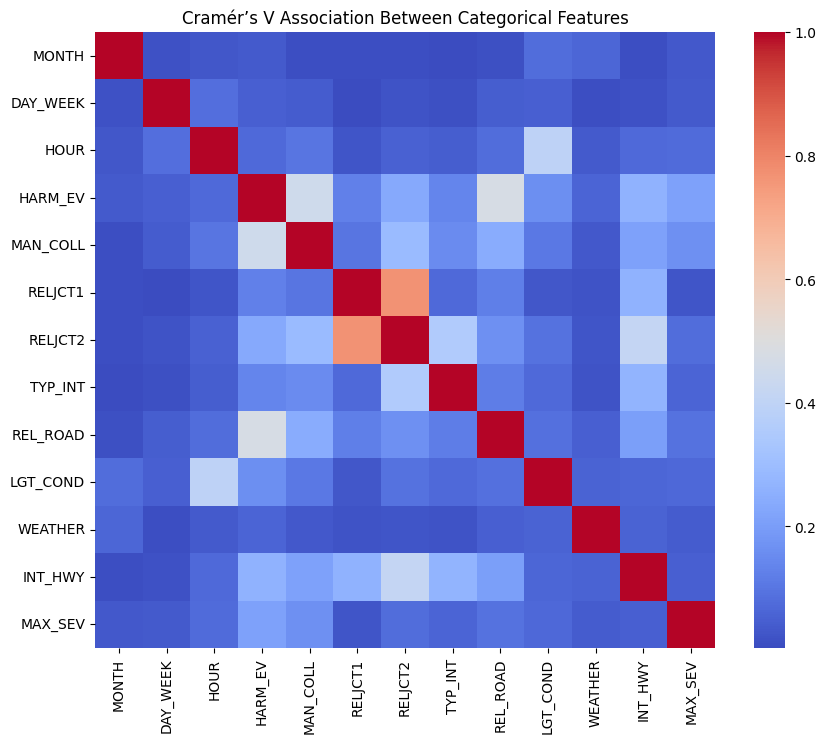

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Compute pairwise Cramér’s V for all categorical features
cat_cols = df.columns
cramers = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers.loc[col1, col2] = 1.0
        else:
            cramers.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers = cramers.astype(float)

# 🔍 visualize heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(cramers, cmap="coolwarm", annot=False)
plt.title("Cramér’s V Association Between Categorical Features")
plt.show()



In [18]:
#drop high correlated column
df = df.drop(columns='RELJCT1')

In [49]:
df.describe()

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT2,TYP_INT,REL_ROAD,LGT_COND,WEATHER,INT_HWY,MAX_SEV
count,286803,286803,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803.0,286803
unique,12,7,24.0,54.0,9.0,13.0,9.0,11.0,7.0,13.0,2.0,5
top,10,6,17.0,12.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0
freq,28605,47908,24280.0,190546.0,95450.0,124694.0,162291.0,230763.0,196299.0,205188.0,259485.0,126537


In [50]:
df.head(5)

,MONTH,DAY_WEEK,HOUR,HARM_EV,MAN_COLL,RELJCT2,TYP_INT,REL_ROAD,LGT_COND,WEATHER,INT_HWY,MAX_SEV
0,1,7,9.0,12.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,4
1,1,7,21.0,42.0,0.0,1.0,1.0,4.0,2.0,2.0,1.0,2
2,1,1,5.0,12.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,0
3,1,7,22.0,12.0,1.0,1.0,1.0,1.0,3.0,2.0,0.0,0
4,1,1,2.0,24.0,0.0,19.0,1.0,4.0,3.0,99.0,0.0,1


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['MAX_SEV'])
y = df['MAX_SEV']
for col in X.columns:
    X[col] = X[col].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### 1. Simple model Analysis
This one uses very simple tree, without class weight balance to observe how the tree behaves on very unbalanced dataset

In [20]:
#Very basic Decision Tree model with default parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.39957694587464115
              precision    recall  f1-score   support

           0       0.54      0.64      0.58     37961
           1       0.27      0.25      0.26     20480
           2       0.27      0.21      0.24     15417
           3       0.20      0.15      0.17     10156
           4       0.09      0.07      0.08      2027

    accuracy                           0.40     86041
   macro avg       0.27      0.26      0.27     86041
weighted avg       0.37      0.40      0.38     86041



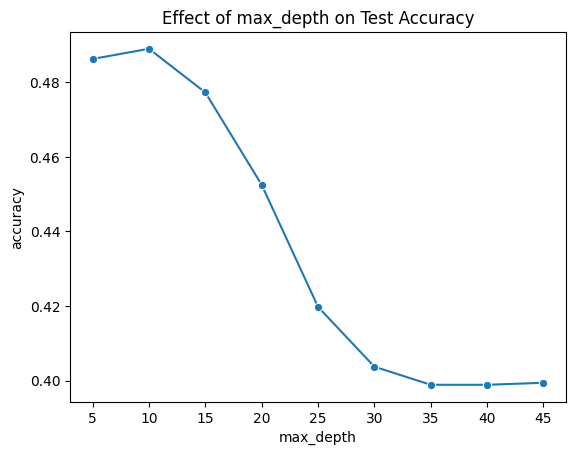

In [21]:
#Hyperparameter tuning: max_depth
depths = range(5, 50, 5)
acc = []
for i in depths:
    dt = DecisionTreeClassifier(max_depth=i, random_state=RANDOM_STATE)
    dt.fit(X_train,y_train)
    acc.append(dt.score(X_test, y_test))
#Plot the trend using seaborn
df_depth = pd.DataFrame({
    "max_depth": depths,
    "accuracy": acc
})
sns.lineplot(data=df_depth, x="max_depth", y="accuracy", marker="o")
plt.title("Effect of max_depth on Test Accuracy")
plt.show()

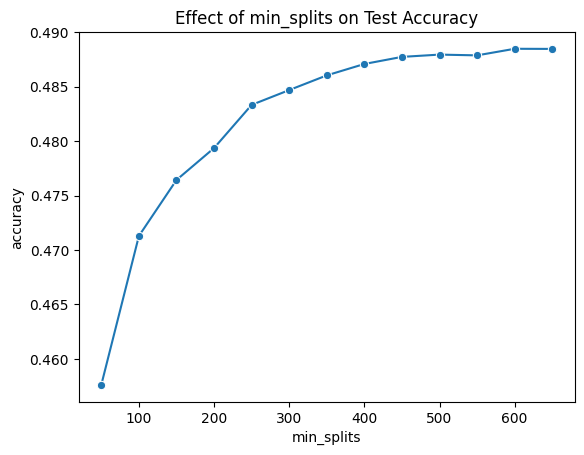

In [22]:
#Hyperparameter tuning: min_samples_split
min_splits = range(50,700,50)
acc2 = []
for i in min_splits:
    dt = DecisionTreeClassifier(max_depth=None,min_samples_split=i, random_state=42)
    dt.fit(X_train,y_train)
    acc2.append(dt.score(X_test, y_test))
#Plot the trend using seaborn
df_split = pd.DataFrame({
    "min_splits": min_splits,
    "accuracy": acc2
})
sns.lineplot(data=df_split, x="min_splits", y="accuracy", marker="o")
plt.title("Effect of min_splits on Test Accuracy")
plt.show()

In [23]:
#Final model after hyperparameter tuning
dt = DecisionTreeClassifier(max_depth=10, min_samples_split= 500, random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.4907776525144989
              precision    recall  f1-score   support

           0       0.51      0.98      0.67     37961
           1       0.35      0.04      0.07     20480
           2       0.43      0.24      0.31     15417
           3       0.34      0.06      0.10     10156
           4       0.38      0.04      0.07      2027

    accuracy                           0.49     86041
   macro avg       0.40      0.27      0.24     86041
weighted avg       0.43      0.49      0.38     86041



     Feature  Importance
3    HARM_EV    0.611853
4   MAN_COLL    0.222440
5    RELJCT2    0.053863
9    WEATHER    0.026713
7   REL_ROAD    0.023928
2       HOUR    0.021217
8   LGT_COND    0.013862
6    TYP_INT    0.008456
0      MONTH    0.007666
10   INT_HWY    0.006486
1   DAY_WEEK    0.003515


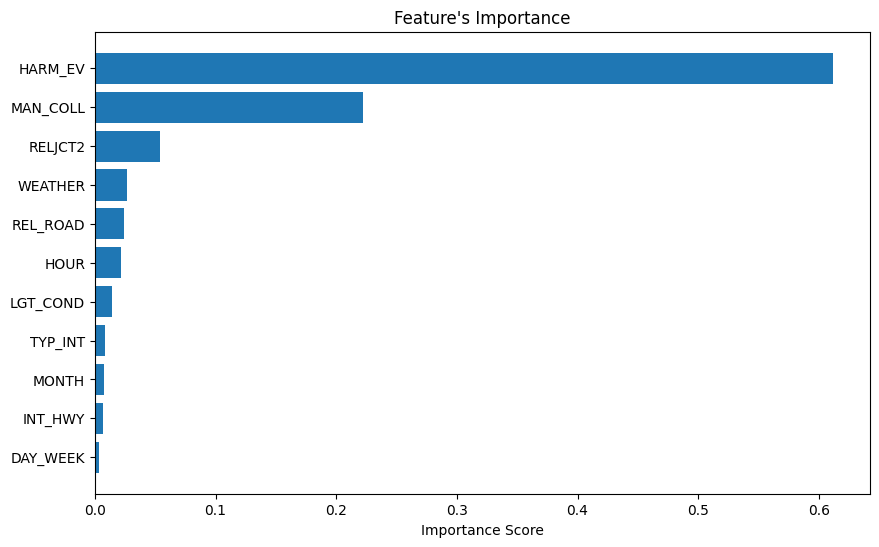

In [24]:
#Feature importance visualization
# Get feature importances from your trained decision tree
importances = dt.feature_importances_
feat_names = X_train.columns

# Put into DataFrame
feat_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Print top features
print(feat_df.head(20))

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_df["Feature"].head(20), feat_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature's Importance")
plt.show()


In [25]:
#can add anything otherthing to explore this Decsision Tree model

#### 2. Advance Method with different sampling methods

In [62]:
# XGBoost with RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

ros = RandomOverSampler(random_state=42)

xgb_recall = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    eval_metric="mlogloss",
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1
)

pipe = Pipeline([
    ("ros", ros),     # oversample minority
    ("xgb", xgb_recall)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.38538603688938994
              precision    recall  f1-score   support

           0       0.66      0.48      0.56     37961
           1       0.30      0.37      0.33     20480
           2       0.36      0.27      0.31     15417
           3       0.20      0.21      0.21     10156
           4       0.09      0.50      0.15      2027

    accuracy                           0.39     86041
   macro avg       0.32      0.37      0.31     86041
weighted avg       0.46      0.39      0.41     86041



In [ ]:
#XGBoost with RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

rus = RandomUnderSampler(
    random_state=42,
    replacement=False
)

xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    eval_metric="mlogloss",
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1
)

pipe = Pipeline([
    ("rus", rus),     # ⬅️ Downsample majority
    ("xgb", xgb_model)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.3664764472751363
              precision    recall  f1-score   support

           0       0.66      0.47      0.54     37961
           1       0.30      0.34      0.31     20480
           2       0.33      0.25      0.28     15417
           3       0.18      0.20      0.19     10156
           4       0.08      0.52      0.14      2027

    accuracy                           0.37     86041
   macro avg       0.31      0.35      0.30     86041
weighted avg       0.44      0.37      0.39     86041



In [35]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score
import numpy as np

# ============================
# 1. Define resampler + model
# ============================
smk = SMOTETomek(random_state=42)

xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
    eval_metric="mlogloss",
    tree_method="hist",
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

pipe = Pipeline([
    ("smk", smk),  
    ("xgb", xgb_model)
])

# ============================
# 2. Set up Stratified 5-Fold CV
# ============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ============================
# 3. Compute CV metrics
# ============================
cv_accuracy = cross_val_score(
    pipe, X_train, y_train,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

cv_macro_f1 = cross_val_score(
    pipe, X_train, y_train,
    cv=cv,
    scoring=make_scorer(f1_score, average="macro"),
    n_jobs=-1
)

print("=== 5-Fold CV Results (SMOTETomek + XGBoost) ===")
print("Accuracy (each fold):", cv_accuracy)
print("Mean Accuracy:", np.mean(cv_accuracy))
print("Macro F1 (each fold):", cv_macro_f1)
print("Mean Macro F1:", np.mean(cv_macro_f1))

# ============================
# 4. Train final model on ALL training data
# ============================
pipe.fit(X_train, y_train)

# ============================
# 5. Evaluate on test set
# ============================
y_pred = pipe.predict(X_test)

print("\n=== Test Set Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Users/Vu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Vu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Vu/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/Vu/Library/Python/3.9/lib/python/site-pack

=== 5-Fold CV Results (SMOTETomek + XGBoost) ===
Accuracy (each fold): [0.40129007 0.39441636 0.39738992 0.39507372 0.39654314]
Mean Accuracy: 0.3969426394380209
Macro F1 (each fold): [0.31660785 0.3090891  0.31453673 0.31093411 0.31278471]
Mean Macro F1: 0.31279049903165645

=== Test Set Results ===
Accuracy: 0.3978800804267733
              precision    recall  f1-score   support

           0       0.64      0.52      0.57     37961
           1       0.30      0.37      0.33     20480
           2       0.37      0.26      0.31     15417
           3       0.22      0.22      0.22     10156
           4       0.09      0.40      0.15      2027

    accuracy                           0.40     86041
   macro avg       0.32      0.35      0.31     86041
weighted avg       0.45      0.40      0.41     86041



In [67]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    classification_report
)
import numpy as np

# ============================
# 1. Resampler + CatBoost model
# ============================
smk = SMOTETomek(random_state=42)

cat_model = CatBoostClassifier(
    loss_function="MultiClass",
    iterations=500,
    depth=8,
    learning_rate=0.05,
    random_seed=42,
    verbose=False
)

pipe_cat = Pipeline([
    ("smk", smk),
    ("cat", cat_model)
])

# ============================
# 2. Stratified 5-fold CV
# ============================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_acc = cross_val_score(
    pipe_cat, X_train, y_train,
    cv=cv,
    scoring="accuracy"
    # if you get pickling errors, remove n_jobs or set n_jobs=1
)

cv_macro_f1 = cross_val_score(
    pipe_cat, X_train, y_train,
    cv=cv,
    scoring=make_scorer(f1_score, average="macro")
)

print("=== 5-Fold CV Results (SMOTETomek + CatBoost) ===")
print("Accuracy (each fold):", cv_acc)
print("Mean Accuracy:", np.mean(cv_acc))
print("Macro F1 (each fold):", cv_macro_f1)
print("Mean Macro F1:", np.mean(cv_macro_f1))

# ============================
# 3. Train final model on all training data
# ============================
pipe_cat.fit(X_train, y_train)

# ============================
# 4. Evaluate on test set
# ============================
y_pred = pipe_cat.predict(X_test)

print("\n=== Test Set Results (CatBoost) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== 5-Fold CV Results (SMOTETomek + CatBoost) ===
Accuracy (each fold): [0.40124026 0.39488955 0.39866009 0.39758916 0.39890915]
Mean Accuracy: 0.39825764031777494
Macro F1 (each fold): [0.31631488 0.30926618 0.3159873  0.31271601 0.31442342]
Mean Macro F1: 0.31374155677834636

=== Test Set Results (CatBoost) ===
Accuracy: 0.39991399449099846
              precision    recall  f1-score   support

           0       0.64      0.52      0.57     37961
           1       0.30      0.38      0.34     20480
           2       0.38      0.26      0.31     15417
           3       0.22      0.21      0.21     10156
           4       0.09      0.41      0.15      2027

    accuracy                           0.40     86041
   macro avg       0.33      0.36      0.32     86041
weighted avg       0.45      0.40      0.42     86041



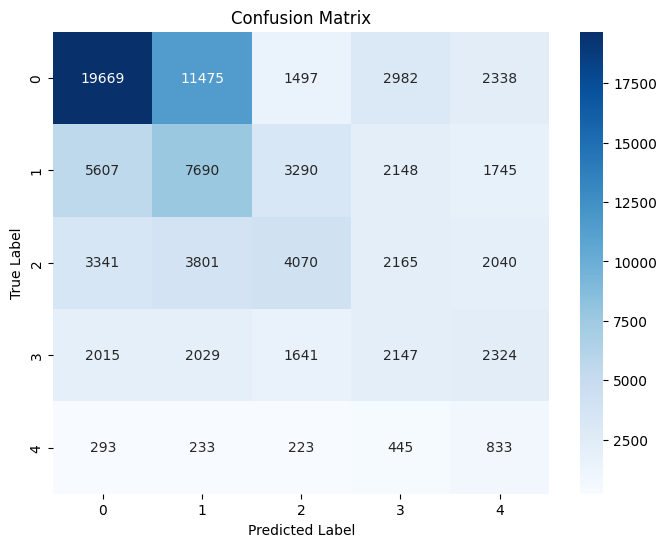

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0,1,2,3,4],
            yticklabels=[0,1,2,3,4])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



=== CatBoost Feature Importance ===
     feature  importance
3    HARM_EV   20.371006
4   MAN_COLL   17.141608
5    RELJCT2    9.921781
8   LGT_COND    8.973592
2       HOUR    8.921351
9    WEATHER    8.168343
0      MONTH    7.293254
6    TYP_INT    6.790484
1   DAY_WEEK    5.947426
7   REL_ROAD    5.127656
10   INT_HWY    1.343498


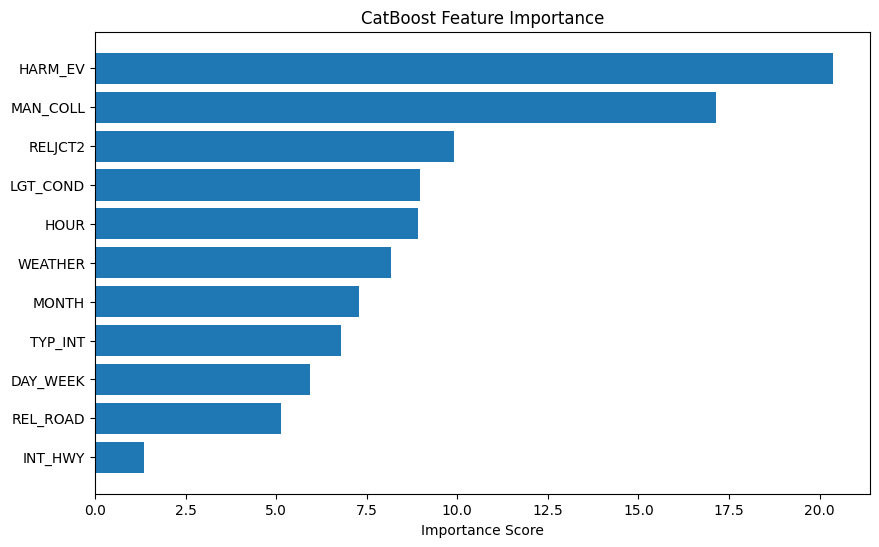

In [69]:
# ============================
# 5. Feature Importance (CatBoost)
# ============================

import matplotlib.pyplot as plt
import pandas as pd

# Get the trained CatBoost model from the pipeline
cat_fitted = pipe_cat.steps[-1][1]

# Get importance values
importances = cat_fitted.get_feature_importance()

# Make sure X_train is a DataFrame so we have column names
feature_names = X_train.columns  

# Combine into a DataFrame
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print("\n=== CatBoost Feature Importance ===")
print(feat_imp.head(20))   # show top 20 features

# Plot top 20
plt.figure(figsize=(10, 6))
plt.barh(feat_imp["feature"], feat_imp["importance"].head(20))
plt.gca().invert_yaxis()  # highest importance on top
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [72]:
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# ============================================
# 1. Re-map target into binary labels
# ============================================
# 0, 1, 2 → 0 (Non-Severe)
# 3, 4     → 1 (Severe)

y_binary = y.copy()
y_binary = y_binary.replace({0:0, 1:0, 2:0, 3:1, 4:1})

# Split again using binary labels
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# ============================================
# 2. Resampler + CatBoost model
# ============================================
smk = SMOTETomek(random_state=42)

cat_model = CatBoostClassifier(
    loss_function="Logloss",      # Binary classification
    iterations=500,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

pipe_bin = Pipeline([
    ("smk", smk),       # Balanced binary dataset
    ("cat", cat_model)
])

# ============================================
# 3. Train the model
# ============================================
pipe_bin.fit(X_train_bin, y_train_bin)

# ============================================
# 4. Predict + evaluate
# ============================================
y_pred_bin = pipe_bin.predict(X_test_bin)

print("\n=== Binary CatBoost Results ===")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_bin, target_names=["Non-Severe", "Severe"]))


/var/folders/83/lj7q7r3n2378j68znzw3f4hc0000gp/T/ipykernel_5668/2554949828.py:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_binary = y_binary.replace({0:0, 1:0, 2:0, 3:1, 4:1})



=== Binary CatBoost Results ===
Accuracy: 0.6893922664776095

Classification Report:
              precision    recall  f1-score   support

  Non-Severe       0.91      0.70      0.80     73858
      Severe       0.25      0.60      0.35     12183

    accuracy                           0.69     86041
   macro avg       0.58      0.65      0.57     86041
weighted avg       0.82      0.69      0.73     86041



In [77]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# ============================================
# 1. Make binary labels on existing split
#    0,1,2 -> 0 (Non-severe)
#    3,4   -> 1 (Severe)
# ============================================
y_train_bin = y_train.replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 1})
y_test_bin  = y_test.replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 1})

# ============================================
# 2. Oversampler + CatBoost model
# ============================================
ros = RandomOverSampler(
    sampling_strategy=1,
    random_state=42
)


cat_model = CatBoostClassifier(
    loss_function="Logloss",   # binary classification
    iterations=500,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    verbose=False
)

pipe_bin = Pipeline([
    ("ros", ros),      # ⬅️ oversample minority class (Severe)
    ("cat", cat_model)
])

# ============================================
# 3. Train
# ============================================
pipe_bin.fit(X_train, y_train_bin)

# ============================================
# 4. Predict + evaluate
# ============================================
y_pred_bin = pipe_bin.predict(X_test)

print("\n=== Binary CatBoost (Oversampling) Results ===")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print(classification_report(
    y_test_bin, y_pred_bin,
    target_names=["Non-Severe (0-2)", "Severe (3-4)"]
))


/var/folders/83/lj7q7r3n2378j68znzw3f4hc0000gp/T/ipykernel_5668/650962843.py:12: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_train_bin = y_train.replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 1})
/var/folders/83/lj7q7r3n2378j68znzw3f4hc0000gp/T/ipykernel_5668/650962843.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  y_test_bin  = y_test.replace({0: 0, 1: 0, 2: 0, 3: 1, 4: 1})



=== Binary CatBoost (Oversampling) Results ===
Accuracy: 0.6747480852151881
                  precision    recall  f1-score   support

Non-Severe (0-2)       0.93      0.67      0.78     73858
    Severe (3-4)       0.26      0.68      0.37     12183

        accuracy                           0.67     86041
       macro avg       0.59      0.68      0.58     86041
    weighted avg       0.83      0.67      0.72     86041



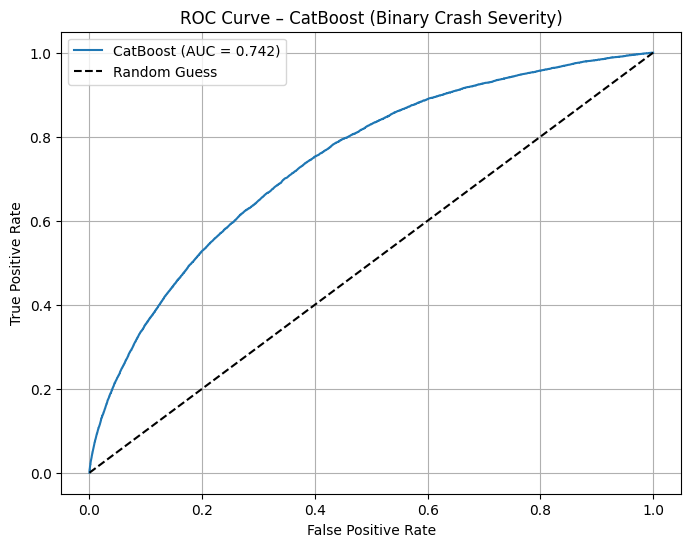

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ===============================
# 1. Get predicted probabilities
# ===============================
# CatBoost outputs probability for class 1 (Severe)
y_proba = pipe_bin.predict_proba(X_test)[:, 1]

# ===============================
# 2. Compute ROC curve + AUC
# ===============================
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba)
auc_score = roc_auc_score(y_test_bin, y_proba)

# ===============================
# 3. Plot ROC curve
# ===============================
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – CatBoost (Binary Crash Severity)")
plt.legend()
plt.grid(True)
plt.show()
